# Homework #1
**Stu. name:** Seyed Mohammad Amin Dadgar <br>
**Stu. id:** 4003624016

**Used Tools and Libraries**

**Numpy:** NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. (https://numpy.org/)

**Matplotlib:**
Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK. (https://matplotlib.org/)    

**IPython:** IPython is a command shell for interactive computing in multiple programming languages, originally developed for the Python programming language, that offers introspection, rich media, shell syntax, tab completion, and history. IPython provides the following features: Interactive shells.(https://ipython.org/)

*Note:* The libraries description is copied from https://www.wikipedia.org/.

# Fuzzy sets and related topics

## Ex 2. 
Question 2 of the second chapter of Zimmermann, 4th ed, 2001 book

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

## suppress the scientific notation of numbers
np.set_printoptions(suppress=True)

In [2]:
def find_alpha_cuts(A_tilda, **kwargs):
    """
    Find all the alpha-cuts of a fuzzy set
    
    Parameters:
    ------------
    A_tilda : array of tuples
        The fuzzy set that we are trying to find its alpha cuts
    kwargs -> interval : Floating number between `0` and `1`
        the alpha-cuts computed from intervals, example `0.25` have five alpha-cuts `0`, `0.25`, `0.5`, `0.75`, `1`
        Note: `0` and `1` are excluded!
        default is `-1`
    kwargs -> alpha_cuts : array_like
        if alpha_cuts are sent as input, the intervals variable would be omited
        An array of floating points between `0` and `1`, default is None
    
    **Important**: one of interval or alpha_cuts should be sent as input, otherwise an error would be raised!
        
    Returns:
    --------
    alpha_cuts : dictionary
        a python dictionary with key of alpha-cuts and values
    strong_alpha_cuts : dictionary
        a python dictionary with key of alpha-cuts and values
    """
    ## create dictionaries to save later
    alpha_cuts = {}
    alpha_cuts_strong = {}
    
    ## intialize the variable
    alpha_cuts_interval = []
        
    if 'interval' in kwargs:
        alpha_cuts_interval = np.arange(0, 1, kwargs['interval'])
    elif 'alpha_cuts' in kwargs:
        alpha_cuts_interval = kwargs['alpha_cuts']
    else:
        raise "Error: One of the interval or alpha_cuts variable must have a value! (Not both either)" 
        
    ## for each alpha-cut
    ## step is alpha-cut in each iteration
    for step in alpha_cuts_interval:
        ## choose the values of the alpha-cut
        values = A_tilda[A_tilda[:, 1] >= step]
        
        ## choose the values of strong alpha-cuts
        strong_values = A_tilda[A_tilda[:, 1] > step]
    
        ## save the alpha-cut set with the key of alpha-cut value
        alpha_cuts[step] = values
        alpha_cuts_strong[step] = strong_values
        
    ## the loop does not find the alpha-cut = 1
    ## alpha-cut = 1 is actually the whole set!
    alpha_cuts[1.0] = A_tilda[A_tilda[:, 1] == 1]
        
    return alpha_cuts, alpha_cuts_strong

In [3]:
def plot_scatter_alpha_cuts(alpha_cut_set):
    """
    Plot the level sets of alpha cuts, using scatter plot
    
    Parameters:
    ----------
    alpha_cut_set : fictionary
        a dictionary of alpha_cuts related to a fuzzy set
        
    """
    
    keys = alpha_cut_set.keys()
    ## initialize an array to plot the data
    plot_data = []
    
    ## create the (x,y) array to plot the data
    for step in keys:
        ## find the values with membeship value equal to step
        value = alpha_cut_set[step]
        value = value[:, 0]
        ## get the values count for each alpha levels
        values_count = len(value)
        
        ## create an array of x_values and their alpha set
        alpha_level = np.full(values_count, step)
        data = np.stack((value, alpha_level), axis=1)
        ## the y value is actually the alphas
        plot_data.append(data)
    
    ## convert to a numpy array
    plot_data = np.array(plot_data, dtype=object)
    
    ## create x and y array to save the y_ticks
    y_ticks = []
    x_ticks = []
    for data in plot_data:
        X = data[:, 0]
        Y = data[:, 1]
        
        y_ticks = np.append(y_ticks, Y)
        x_ticks = np.append(x_ticks, X)
        plt.scatter(X, Y)
    
    plt.xticks(x_ticks)
    plt.yticks(y_ticks)
    plt.show()

### Part (a)

In [4]:
A = np.array([[3, 1], [4, 0.2], [5, 0.3], [6, 0.4], 
                  [7, 0.6], [8, 0.8], [10, 1], [12, 0.8], [14, 0.6] ])
A_alpha_cuts_set, A_strong_alpha_cuts_set = find_alpha_cuts(A, interval=0.25)

To see how it works we just print one of the alpha-cuts set once.

In [5]:
A_alpha_cuts_set

{0.0: array([[ 3. ,  1. ],
        [ 4. ,  0.2],
        [ 5. ,  0.3],
        [ 6. ,  0.4],
        [ 7. ,  0.6],
        [ 8. ,  0.8],
        [10. ,  1. ],
        [12. ,  0.8],
        [14. ,  0.6]]),
 0.25: array([[ 3. ,  1. ],
        [ 5. ,  0.3],
        [ 6. ,  0.4],
        [ 7. ,  0.6],
        [ 8. ,  0.8],
        [10. ,  1. ],
        [12. ,  0.8],
        [14. ,  0.6]]),
 0.5: array([[ 3. ,  1. ],
        [ 7. ,  0.6],
        [ 8. ,  0.8],
        [10. ,  1. ],
        [12. ,  0.8],
        [14. ,  0.6]]),
 0.75: array([[ 3. ,  1. ],
        [ 8. ,  0.8],
        [10. ,  1. ],
        [12. ,  0.8]]),
 1.0: array([[ 3.,  1.],
        [10.,  1.]])}

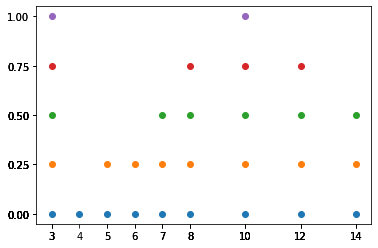

In [6]:
plot_scatter_alpha_cuts(A_alpha_cuts_set)

**Question 3 Answer**: With this alpha levels we can see that $\tilde{A}$ is *not convex*. The reason is for $\alpha = 1$ there is no value for $4,5,6,8$ and $8$.

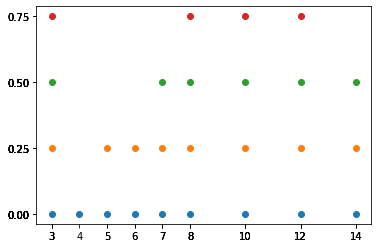

In [7]:
plot_scatter_alpha_cuts(A_strong_alpha_cuts_set)

Because our values for $\tilde{A}$ was discrete we plotted scatter plot for it.

### Part (b)
\begin{equation}
\tilde{B} = {(x, \mu_{\tilde{B}}(x) = (1+(x-10)^2)^{-1})} \\
\text{for } \alpha = 0.3, 0.5, 0.8
\end{equation}

In [8]:
def mu_B(x , normalize = True):
    """
    calculating the membership function for \tilde{B}
    
    Parameters:
    -----------
    x : array_like
        array of numerics
    normalize : boolean
        normalize the membership values, default is True
    
    Returns:
    --------
    x_tilda : array of tuples
        the fuzzy set
        an array composed by values and normalized fuzzy membership values
    """
    
    membership_value = np.power(1 + np.power(x - 10, 2), -1)
    
    x_tilda = np.stack((x, membership_value), axis=1)

    return x_tilda
def normalize_membership(membership_values):
    """
    normalize the values of membership function of a fuzzy set to [0, 1]
    
    Parameters:
    ------------
    membership_values : array_like
        membership values for a fuzzy set
        
    Returns:
    ---------
    membership_normalized : array_like
        membership values of a fuzzy set normalized to the interval [0, 1]
    """
    assert (membership_values >= 0).all(), "Error: all the membership values must be positive!"
    
    ## normalize
    membership_normalized = membership_values / max(membership_values)
    
    return membership_normalized

In [13]:
x = np.arange(1, 15).astype(float)
B_tilde = mu_B(x)
B_tilde

array([[ 1.        ,  0.01219512],
       [ 2.        ,  0.01538462],
       [ 3.        ,  0.02      ],
       [ 4.        ,  0.02702703],
       [ 5.        ,  0.03846154],
       [ 6.        ,  0.05882353],
       [ 7.        ,  0.1       ],
       [ 8.        ,  0.2       ],
       [ 9.        ,  0.5       ],
       [10.        ,  1.        ],
       [11.        ,  0.5       ],
       [12.        ,  0.2       ],
       [13.        ,  0.1       ],
       [14.        ,  0.05882353]])

In [14]:
B_alpha_cuts_set, B_strong_alpha_cuts_set = find_alpha_cuts(B_tilde, alpha_cuts=[0.3, 0.5, 0.8])

Again our values for $\tilde{B}$ is discrete, so we plot a scatter plot for it.

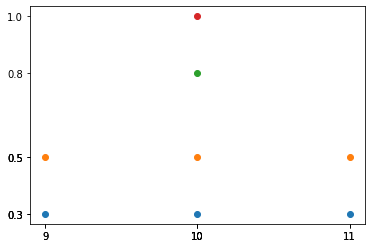

In [16]:
plot_scatter_alpha_cuts(B_alpha_cuts_set)

**Question 3 Answer**: With this alpha levels we can see that $\tilde{B}$ is *convex*!

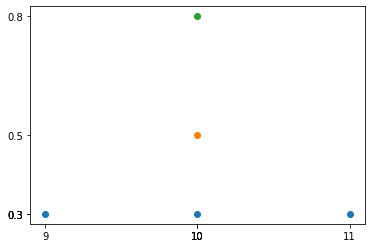

In [17]:
plot_scatter_alpha_cuts(B_strong_alpha_cuts_set)

### Part (c)
\begin{equation}
\tilde{C} = {\{x, \mu_{\tilde{C}}(x)\}} \\
\mu_{\tilde{C}} = 0 \text{ for } x \leq 10 \\
\mu_{\tilde{C}} = (1+(x-10)^2)^{-1}) \text{ for } x>10
\end{equation}

In [22]:
def mu_C(x , normalize = True):
    """
    calculating the membership function for \tilde{C}
    
    Parameters:
    -----------
    x : array_like
        array of numerics
    normalize : boolean
        normalize the membership values, default is True
    
    Returns:
    --------
    x_tilda : array of tuples
        the fuzzy set
        an array composed by values and normalized fuzzy membership values
    """
    
    membership_value = np.power(1 + np.power(x - 10, 2), -1)
    
    ## apply the other condition that all the values less equal than 10 have zero membership
    membership_value = np.where(x <= 10, 0, membership_value)

    
    ## normalize
    membership_value = normalize_membership(membership_value)
    
    
    x_tilda = np.stack((x, membership_value), axis=1)

    return x_tilda

In [23]:
C = np.arange(0, 25).astype(float)
C_tilde = mu_C(C)
C_tilde

array([[ 0.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 2.        ,  0.        ],
       [ 3.        ,  0.        ],
       [ 4.        ,  0.        ],
       [ 5.        ,  0.        ],
       [ 6.        ,  0.        ],
       [ 7.        ,  0.        ],
       [ 8.        ,  0.        ],
       [ 9.        ,  0.        ],
       [10.        ,  0.        ],
       [11.        ,  1.        ],
       [12.        ,  0.4       ],
       [13.        ,  0.2       ],
       [14.        ,  0.11764706],
       [15.        ,  0.07692308],
       [16.        ,  0.05405405],
       [17.        ,  0.04      ],
       [18.        ,  0.03076923],
       [19.        ,  0.02439024],
       [20.        ,  0.01980198],
       [21.        ,  0.01639344],
       [22.        ,  0.0137931 ],
       [23.        ,  0.01176471],
       [24.        ,  0.01015228]])

In [25]:
C_alpha_cuts_set, C_strong_alpha_cuts_set = find_alpha_cuts(C_tilde, interval = 0.25)

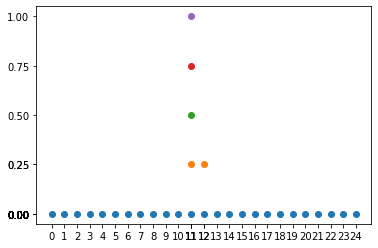

In [26]:
plot_scatter_alpha_cuts(C_alpha_cuts_set)

**Question 3 Answer**: With this alpha levels we can see that $\tilde{C}$ is *convex*!

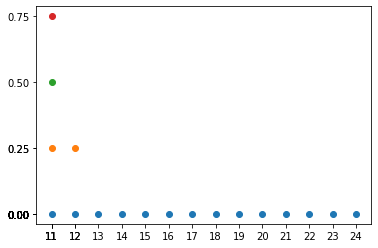

In [27]:
plot_scatter_alpha_cuts(C_strong_alpha_cuts_set)

## Ex 3. 
Question 3 of the second chapter of Zimmermann, 4th ed, 2001 book

The answers for this question is added in above cells.

## Ex 4. 
Answer to the question 2 of chapter 4 from the book Ross, 4th ed. 2017.

To answer this question we need to write some equations.
first we know that the equation below is correct.
\begin{equation}
r \leq \lambda r + (1 - \lambda) s \leq s \\
\text{OR} \\
s \leq \lambda s + (1 - \lambda) r \leq r \\
\end{equation}
This means that each $\lambda r + (1 - \lambda) s$ is between r and s, and because our fuzzy set is convex we can assign the equation below to it
\begin{equation}
\mu_{\tilde{A}}[r] \leq \mu_{\tilde{A}}[\lambda r + (1 - \lambda) s] \leq \mu_{\tilde{A}}[s] \\
\text{OR} \\
\mu_{\tilde{A}}[s] \leq \mu_{\tilde{A}}[\lambda s + (1 - \lambda) r] \leq \mu_{\tilde{A}}[r]
\end{equation}
So using the equation above we can say that the term $\lambda r + (1 - \lambda) s$, is always greater equal than minimum of $\mu_{\tilde{A}}(r),\mu_{\tilde{A}}(s)$. And we can write the equation
\begin{equation}
\mu_{\tilde{A}}[\lambda s + (1 - \lambda) r] \geq min[\mu_{\tilde{A}}(r),\mu_{\tilde{A}}(s)]
\end{equation}

## Ex 5. 
Question 4 of the second chapter of Zimmermann, 4th ed, 2001 book

In [18]:
def find_cardinality(fuzzy_set):
    """
    Find the cardinality of a fuzzy set 
    
    Parameters:
    -----------
    fuzzy_set : array of tuples
        the fuzzy set is an array of tuples
        
    Returns:
    ---------
    cardinality : float
        the calculated cardinality of a fuzzy set
    """
    ## the second item in each dimension is the membership function value
    cardinality = np.sum(fuzzy_set[:, 1])
    return cardinality

def find_relative_cardinality(fuzzy_set, whole_set):
    """
    Find the relative cardinality value for the fuzzy set
    
    Parameters:
    -----------
    fuzzy_set : array of tuples
        the fuzzy set is an array of tuples
    whole_set : array of tuples
        the whole set we are calculating the fuzzy set relative cardinality with respect to it
        
    Returns:
    ---------
    cardinality : float
        the calculated cardinality of a fuzzy set
    
    """
    
    cardinality = np.sum(fuzzy_set[:, 1])
    ## the whole set is a set with all membership values equal to one
    whole_set_cardinality = len(whole_set)
    
    return cardinality / whole_set_cardinality

def find_fuzziness(fuzzy_set, **kwargs):
    """
    Find how much a fuzzy set is fuzzy
    
    Parameters:
    -----------
    fuzzy_set : array of tuples
        the fuzzy set is an array of tuples
    **kwargs : metrics
        entropy : find the fuzziness value using entropy metric, the value sent here would be used as K in entropy equation
        distance : find the fuzziness value using minkowski, the value sent here is used as p in the equation
        
    Returns:
    ---------
    fuzziness : array_like
        if both metrics was requested an array is sent as input (entropy, distance)
        else a floating point is returned
    """
    ###### METHOD SELECTION ######
    
    ## the method is chosen using the kwargs
    ## if both was chosen find both values
    ## if nothing was sent as kwargs entropy would be used as default
    method = ''
    if 'entropy' in kwargs and 'distance' in kwargs:
        method = 'entropy & distance'
    elif 'entropy' in kwargs:
        method = 'entropy'
    elif 'distance' in kwargs:
        method = 'distance'
    else:
        ## default if nothing was entered
        method = 'entropy'
        
    
    ###### Calculate the requested metrics ######
    if method == 'entropy':
        K = kwargs['entropy']
        K = int(K)
        entropy = find_entropy(fuzzy_set, K)
        
        print(f'Fuzziness entropy: {entropy}')
        
        fuzziness = entropy 
        
    elif method == 'entropy & distance':
        K = kwargs['entropy']
        K = int(K)
        entropy = find_entropy(fuzzy_set, K)
        
        p = kwargs['distance']
        p = int(p)
        minkowski = find_minkowski(fuzzy_set, p)
        distance = find_distance(fuzzy_set, minkowski)
        
        print(f'Fuzziness entropy with K={K}: {entropy}')
        print(f'Fuzziness Minkowski with p={p}: {distance}')
        
        fuzziness = [entropy, distance]
        
    elif method == 'distance':
        p = kwargs['distance']
        p = int(p)
        minkowski = find_minkowski(fuzzy_set, p)
        distance = find_distance(fuzzy_set, minkowski)
        
        print(f'Fuzziness Minkowski with p={p}: {distance}')
        
        fuzziness = distance
        
    return fuzziness
        

def find_distance(fuzzy_set, minkowski):
    """
    find the distance using the minkowski metric
    
    Parameters:
    -----------
    fuzzy_set : array of tuples
        the fuzzy set is an array of tuples
    minkowski : float
        the minkowski calculated distance
    
    Returns:
    --------
    distance : float
        distance calculated using minkowski metric
    """
    ## support size is the count of non-zero membership function values
    support_set_size = len(fuzzy_set[fuzzy_set[:, 1] != 0])
    
    distance = 1 - (minkowski / support_set_size)
    
    return distance
    
def find_entropy(fuzzy_set, K):
    """
    find the entropy value for a fuzzy set
    
    Parameters:
    -----------
    fuzzy_set : array of tuples
        the fuzzy set is an array of tuples
    K : float
        the hyperparameter to set
        
    Returns:
    ---------
    entropy : float
        the value of entropy
    """
    ## extract the mu values from the fuzzy set
    mu = fuzzy_set[:, 1]
    log_mu = np.log(mu)
    
    ## change the infinity values to 0
    log_mu = np.where(log_mu == -np.inf, 0, log_mu)
    
    ## find the element wise multiply  
    values = np.multiply(mu, log_mu)
    entropy = -K * np.sum(values)
    
    return entropy

def find_minkowski(fuzzy_set, p):
    """
    find the minkowski distance, using the complement of the set
    
    Parameters:
    -----------
    fuzzy_set : array of tuples
        the fuzzy set is an array of tuples
    p : float
        the hyperparameter to set for the function
        
    Returns:
    ---------
    minkowski : float
        the minkowski distance
    """
    ## extract the mu values from the fuzzy set
    mu = fuzzy_set[:, 1]
    ## the complement of the set membership values
    mu_C = 1 - mu
    
    ## differenc of both
    diff = abs(mu - mu_C)
    ## element-wise power
    diff = np.power(diff, p)
    
    value = np.sum(diff)
    
    ## again another power is needed
    minkowski = np.power(value, 1/p)
    
    return minkowski

### Part (a)

In [19]:
A_tilde = np.array([[3, 1], [4, 0.2], [5, 0.3], [6, 0.4], 
                  [7, 0.6], [8, 0.8], [10, 1], [12, 0.8], [14, 0.6] ])
## X is our whole set
X = np.arange(1, 15)

In [20]:
find_cardinality(A_tilde)

5.699999999999999

In [21]:
find_relative_cardinality(A_tilde, X)

0.4071428571428571

In [22]:
find_fuzziness(A_tilde, entropy=1, distance = 2)

Fuzziness entropy with K=1: 2.0196161471561873
Fuzziness Minkowski with p=2: 0.7963299691130737


[2.0196161471561873, 0.7963299691130737]

### Part (b)

In [23]:
B_tilde = np.array([[2, 0.4], [3, 0.6], [4, 0.8], [5, 1],
                    [6, 0.8], [7, 0.6], [8, 0.4]])
## X is our whole set
X = np.arange(1, 11)

In [24]:
find_cardinality(B_tilde)

4.6

In [25]:
find_relative_cardinality(B_tilde, X)

0.45999999999999996

In [26]:
find_fuzziness(B_tilde, entropy=1, distance = 2)

Fuzziness entropy with K=1: 1.7030530161212485
Fuzziness Minkowski with p=2: 0.8041241542742559


[1.7030530161212485, 0.8041241542742559]

### Part (c)

In [27]:
C_tilde = np.array([[2, 0.4], [4, 0.8], [5, 1], [7, 0.6]])

In [28]:
find_cardinality(C_tilde)

2.8000000000000003

In [29]:
find_relative_cardinality(C_tilde, X)

0.28

In [30]:
find_fuzziness(C_tilde, entropy=1, distance = 2)

Fuzziness entropy with K=1: 0.8515265080606242
Fuzziness Minkowski with p=2: 0.7


[0.8515265080606242, 0.7]

# Fuzzy Operations

## Question 2, chapter 2, Ross, 4th ed. 2017

The tensile strenghts are as
\begin{equation}
\tilde{A} = \{(1, 0.4), (2, 0.35), (3 , 0.5), (4, 0.6)\} \\
\tilde{B} = \{(1, 0.7), (2, 0.75), (3 , 0.65), (4, 0.8)\} 
\end{equation}

### Part (a)
\begin{equation}
\tilde{A} \cap \tilde{B}
\end{equation}
We know that intersect of a fuzzy set, return the minimum membership values from both sets, so the answer is
\begin{equation}
\tilde{A} \cap \tilde{B} = \{(1, 0.4), (2, 0.35), (3 , 0.5), (4, 0.6)\} 
\end{equation}

### Part (b)
\begin{equation}
\tilde{A} \cup \tilde{B}
\end{equation}
And for union the membership for values is the maximum membership value of the both sets.

\begin{equation}
\tilde{A} \cup \tilde{B} =\{(1, 0.7), (2, 0.75), (3 , 0.65), (4, 0.8)\}
\end{equation}

### Part (d)
\begin{equation}
\tilde{A} - \tilde{B}
\end{equation}
First we need to convert minus into intersect
\begin{equation}
\tilde{A} - \tilde{B} = \tilde{A} \cap \neg\tilde{B}
\end{equation}
Then it's easy to find the answer, first we calculate $\neg\tilde{B}$ and then we calculate the intersect with $\tilde{A}$.

So $\neg\tilde{B}$ can be written as
\begin{equation}
\neg\tilde{B} = \{(1, 0.3), (2, 0.25), (3 , 0.65), (4, 0.8)\} 
\end{equation}
And the intersection of $\tilde{A}$ with $\neg\tilde{B}$ is the minimum membership functions of both sets.
\begin{equation}
\tilde{A} \cap \neg\tilde{B} = \{(1, 0.3), (2, 0.25), (3 , 0.35), (4, 0.2)\} = \tilde{A} - \tilde{B}
\end{equation}

## Ex 6. 
Answer to the question 8, chapter 2 from the book Ross, 4th ed. 2017

In [31]:
def membership(x, mu, sigma):
    """
    membership function to calculate membership values for x, with mu and sigma parameters
    
    Parameters:
    -----------
    x : array_like
        set of numeric values
    mu, sigma : integer
        hyperparameters for membership function
        
    Returns:
    --------
    fuzzy_set : array_like
        an array of tuples representing the fuzzy set
    """
    ## find the membership values
    memberships = np.exp(-((x-mu)**2)/ (2* sigma **2) )
    fuzzy_set = np.stack((x, memberships), axis=1 )
    
    return fuzzy_set

In [32]:
X = np.arange(0, 11)
A_tilde = membership(X, 4, 2)
B_tilde = membership(X, 8, 2)

In [33]:
A_tilde

array([[ 0.        ,  0.13533528],
       [ 1.        ,  0.32465247],
       [ 2.        ,  0.60653066],
       [ 3.        ,  0.8824969 ],
       [ 4.        ,  1.        ],
       [ 5.        ,  0.8824969 ],
       [ 6.        ,  0.60653066],
       [ 7.        ,  0.32465247],
       [ 8.        ,  0.13533528],
       [ 9.        ,  0.04393693],
       [10.        ,  0.011109  ]])

In [34]:
B_tilde

array([[ 0.        ,  0.00033546],
       [ 1.        ,  0.00218749],
       [ 2.        ,  0.011109  ],
       [ 3.        ,  0.04393693],
       [ 4.        ,  0.13533528],
       [ 5.        ,  0.32465247],
       [ 6.        ,  0.60653066],
       [ 7.        ,  0.8824969 ],
       [ 8.        ,  1.        ],
       [ 9.        ,  0.8824969 ],
       [10.        ,  0.60653066]])

In [35]:
def intersect_fuzzy(A_tilde, B_tilde):
    """
    Intersect two fuzzy sets
    A intersect B
    
    Parameters:
    -----------
    A_tilde : array of tuples
        the first fuzzy set
    B_tilde : array of tuples
        the second fuzzy set
        
    Returns:
    --------
    fuzzy_set : array of tuples
        the result of A_tilde intersect B_tilde
    """
    fuzzy_set = []
    for value in A_tilde[:, 0]:
        ## get the memberships for each value
        A_var = A_tilde[A_tilde[:, 0] == value][0, 1]
        B_var = A_tilde[A_tilde[:, 0] == value][0, 1]
        
        fuzzy_set.append([value, min(A_var, B_var)])
    return fuzzy_set

def union_fuzzy(A_tilde, B_tilde):
    """
    union two fuzzy sets
    A union B
    
    Parameters:
    -----------
    A_tilde : array of tuples
        the first fuzzy set
    B_tilde : array of tuples
        the second fuzzy set
        
    Returns:
    --------
    fuzzy_set : array of tuples
        the result of A_tilde union B_tilde
    """
    fuzzy_set = []
    for value in A_tilde[:, 0]:
        ## get the memberships for each value
        A_var = A_tilde[A_tilde[:, 0] == value][0, 1]
        B_var = A_tilde[A_tilde[:, 0] == value][0, 1]
        
        fuzzy_set.append([value, max(A_var, B_var)])
    return fuzzy_set

def complement_fuzzy(A_tilde):
    """
    complement of a fuzzy sets
    return not A
    
    Parameters:
    -----------
    A_tilde : array of tuples
        the fuzzy set to be complemented
        
    Returns:
    --------
    fuzzy_set : array of tuples
        the result of not A_tilde
    """
    memberships = 1 - A_tilde[:, 1]
    fuzzy_set = np.stack((A_tilde[:, 0], memberships), axis = 1)
    return fuzzy_set

def difference_fuzzy(A_tilde, B_tilde):
    """
    find the difference between two fuzzy sets
    A - B
    
    Parameters:
    -----------
    A_tilde : array of tuples
        the first fuzzy set
    B_tilde : array of tuples
        the second fuzzy set
        
    Returns:
    --------
    fuzzy_set : array of tuples
        the result of A_tilde - B_tilde
    """
    ## A - B is equal to A intersect not B
    
    not_B_tilde = complement_fuzzy(B_tilde)
    fuzzy_set = intersect_fuzzy(A_tilde, not_B_tilde)
    return fuzzy_set

In [36]:
intersect_fuzzy(A_tilde, B_tilde)

[[0.0, 0.1353352832366127],
 [1.0, 0.32465246735834974],
 [2.0, 0.6065306597126334],
 [3.0, 0.8824969025845955],
 [4.0, 1.0],
 [5.0, 0.8824969025845955],
 [6.0, 0.6065306597126334],
 [7.0, 0.32465246735834974],
 [8.0, 0.1353352832366127],
 [9.0, 0.04393693362340742],
 [10.0, 0.011108996538242306]]

In [37]:
complement_fuzzy(A_tilde)

array([[ 0.        ,  0.86466472],
       [ 1.        ,  0.67534753],
       [ 2.        ,  0.39346934],
       [ 3.        ,  0.1175031 ],
       [ 4.        ,  0.        ],
       [ 5.        ,  0.1175031 ],
       [ 6.        ,  0.39346934],
       [ 7.        ,  0.67534753],
       [ 8.        ,  0.86466472],
       [ 9.        ,  0.95606307],
       [10.        ,  0.988891  ]])

In [38]:
difference_fuzzy(A_tilde, B_tilde)

[[0.0, 0.1353352832366127],
 [1.0, 0.32465246735834974],
 [2.0, 0.6065306597126334],
 [3.0, 0.8824969025845955],
 [4.0, 1.0],
 [5.0, 0.8824969025845955],
 [6.0, 0.6065306597126334],
 [7.0, 0.32465246735834974],
 [8.0, 0.1353352832366127],
 [9.0, 0.04393693362340742],
 [10.0, 0.011108996538242306]]

# Fuzzy Extensions and their properties

## Ex 10. 
Answer the question 3, chapter 3 of Zimmermann, 4th ed, 2001 book.

First we write $\tilde{B}$ and $\tilde{C}$ for the ease of access.
\begin{equation}
\tilde{B} = {(x, \mu_{\tilde{B}}(x) = (1+(x-10)^2)^{-1})} \\
\text{for } \alpha = 0.3, 0.5, 0.8
\end{equation}
And
\begin{equation}
\tilde{C} = {\{x, \mu_{\tilde{C}}(x)\}} \\
\mu_{\tilde{C}} = 0 \text{ for } x \leq 10 \\
\mu_{\tilde{C}} = (1+(x-10)^2)^{-1}) \text{ for } x>10
\end{equation}

In [39]:
def find_hamacher_intersect(A_tilde, B_tilde, gamma):
    """
    apply hamacher intersect operator over two fuzzy sets with hyperparameter gamma
    Note: domains must match in both sets
    Parameters:
    -----------
    A_tilde : array of tuples
        the input fuzzy set 
    B_tilde : array of tuples
        the other input fuzzy set for hamacher equation
    gamma : float
        the hyperparameter for hamacher operator
        
    Returns:
    ---------
    fuzzy_hamacher : array of tuples
        fuzzy set resulting of hamacher operator
    """
    ## check gamma value
    assert gamma>=0, f"gamma value for hamacher intersect must be semi-positive!\nThe inserted value for gamma is {gamma}"
    
    ## retrieve the membership values of each sets
    mu_A = A_tilde[:, 1]
    mu_B = B_tilde[:, 1]
    
    ## devide the hamacher operator into above equation and below
    above = mu_A * mu_B
    
    below = gamma + (1 - gamma)*(mu_A + mu_B - mu_A*mu_B)
    
    hamacher_values = np.divide(above, below)
    
    ## mu_A domain is the same as mu_B
    ## so there is no difference to use other in stacking
    fuzzy_hamacher = np.stack((A_tilde[:, 0], hamacher_values), axis=1)
    
    return fuzzy_hamacher

def find_yager_intersect(A_tilde, B_tilde, p):
    """
    apply yager intersect operator over two fuzzy sets with hyperparameter p
    Note: domains must match in both sets
    
    Parameters:
    -----------
    A_tilde : array of tuples
        the input fuzzy set 
    B_tilde : array of tuples
        the other input fuzzy set for yager equation
    p : float
        the hyperparameter for yager operator
        
    Returns:
    ---------
    fuzzy_yager : array of tuples
        fuzzy set resulting yager intersect
    """
    assert p>=1, f"the hyperparameter p must be equal more than 1!\nThe inserted value for p is {p}"
    
    ## retrieve the membership values of each sets
    mu_A = A_tilde[:, 1]
    mu_B = B_tilde[:, 1]
    
    value = np.power(np.power(1-mu_A,p) + np.power(1-mu_B,p), 1/p)
    ## the array of ones two be compared  
    ones_arr = np.ones(len(value))
    
    mu = np.minimum(ones_arr, value)
    yager_mu = 1 - mu
    ## mu_A domain is the same as mu_B
    ## so there is no difference to use other in stacking
    fuzzy_yager = np.stack((A_tilde[:, 0], yager_mu), axis=1)
    
    return fuzzy_yager

We're using mu_B and mu_C functions in excersise 2 above.

In [40]:
B = np.arange(0, 25)
C = np.arange(0, 25)

B_tilde = mu_B(B)
C_tilde = mu_C(C)

## ignore the warning

<ipython-input-8-08f9839dfa94>:19: RuntimeWarning: divide by zero encountered in true_divide
  membership_value = 1 + 1 / np.power(x - 10, 2)


### (a) apply Hamcher intersect operator with $\gamma=0.25, 0.5, 0.75$

In [41]:
find_hamacher_intersect(B_tilde, C_tilde, 0.25)

array([[ 0.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 2.        ,  0.        ],
       [ 3.        ,  0.        ],
       [ 4.        ,  0.        ],
       [ 5.        ,  0.        ],
       [ 6.        ,  0.        ],
       [ 7.        ,  0.        ],
       [ 8.        ,  0.        ],
       [ 9.        ,  0.        ],
       [10.        ,  0.        ],
       [11.        ,  1.        ],
       [12.        ,  0.43668122],
       [13.        ,  0.36231884],
       [14.        ,  0.33791289],
       [15.        ,  0.32688588],
       [16.        ,  0.32096595],
       [17.        ,  0.31742001],
       [18.        ,  0.31512801],
       [19.        ,  0.3135609 ],
       [20.        ,  0.31244209],
       [21.        ,  0.31161544],
       [22.        ,  0.31098736],
       [23.        ,  0.31049895],
       [24.        ,  0.31011165]])

In [42]:
find_hamacher_intersect(B_tilde, C_tilde, 0.5)

array([[ 0.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 2.        ,  0.        ],
       [ 3.        ,  0.        ],
       [ 4.        ,  0.        ],
       [ 5.        ,  0.        ],
       [ 6.        ,  0.        ],
       [ 7.        ,  0.        ],
       [ 8.        ,  0.        ],
       [ 9.        ,  0.        ],
       [10.        ,  0.        ],
       [11.        ,  1.        ],
       [12.        ,  0.42016807],
       [13.        ,  0.34246575],
       [14.        ,  0.31705979],
       [15.        ,  0.30560579],
       [16.        ,  0.29946407],
       [17.        ,  0.29578798],
       [18.        ,  0.29341297],
       [19.        ,  0.29178962],
       [20.        ,  0.29063092],
       [21.        ,  0.28977494],
       [22.        ,  0.28912465],
       [23.        ,  0.28861902],
       [24.        ,  0.2882181 ]])

In [43]:
find_hamacher_intersect(B_tilde, C_tilde, 0.75)

array([[ 0.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 2.        ,  0.        ],
       [ 3.        ,  0.        ],
       [ 4.        ,  0.        ],
       [ 5.        ,  0.        ],
       [ 6.        ,  0.        ],
       [ 7.        ,  0.        ],
       [ 8.        ,  0.        ],
       [ 9.        ,  0.        ],
       [10.        ,  0.        ],
       [11.        ,  1.        ],
       [12.        ,  0.4048583 ],
       [13.        ,  0.32467532],
       [14.        ,  0.29863084],
       [15.        ,  0.28692699],
       [16.        ,  0.28066219],
       [17.        ,  0.27691626],
       [18.        ,  0.2744977 ],
       [19.        ,  0.27284532],
       [20.        ,  0.27166626],
       [21.        ,  0.27079543],
       [22.        ,  0.27013397],
       [23.        ,  0.26961973],
       [24.        ,  0.26921203]])

### (b) apply Yager intersect operator with $p=1, 5, 10$

In [44]:
find_yager_intersect(B_tilde, C_tilde, 1)

array([[ 0.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 2.        ,  0.        ],
       [ 3.        ,  0.        ],
       [ 4.        ,  0.        ],
       [ 5.        ,  0.        ],
       [ 6.        ,  0.        ],
       [ 7.        ,  0.        ],
       [ 8.        ,  0.        ],
       [ 9.        ,  0.        ],
       [10.        ,  0.        ],
       [11.        ,  1.        ],
       [12.        ,  0.25      ],
       [13.        ,  0.11111111],
       [14.        ,  0.0625    ],
       [15.        ,  0.04      ],
       [16.        ,  0.02777778],
       [17.        ,  0.02040816],
       [18.        ,  0.015625  ],
       [19.        ,  0.01234568],
       [20.        ,  0.01      ],
       [21.        ,  0.00826446],
       [22.        ,  0.00694444],
       [23.        ,  0.00591716],
       [24.        ,  0.00510204]])

In [45]:
find_yager_intersect(B_tilde, C_tilde, 5)

array([[ 0.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 2.        ,  0.        ],
       [ 3.        ,  0.        ],
       [ 4.        ,  0.        ],
       [ 5.        ,  0.        ],
       [ 6.        ,  0.        ],
       [ 7.        ,  0.        ],
       [ 8.        ,  0.        ],
       [ 9.        ,  0.        ],
       [10.        ,  0.        ],
       [11.        ,  1.        ],
       [12.        ,  0.56923812],
       [13.        ,  0.4894674 ],
       [14.        ,  0.46154765],
       [15.        ,  0.44862479],
       [16.        ,  0.44160497],
       [17.        ,  0.43737223],
       [18.        ,  0.43462503],
       [19.        ,  0.43274155],
       [20.        ,  0.43139431],
       [21.        ,  0.43039751],
       [22.        ,  0.42963936],
       [23.        ,  0.42904934],
       [24.        ,  0.42858118]])

In [46]:
find_yager_intersect(B_tilde, C_tilde, 10)

array([[ 0.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 2.        ,  0.        ],
       [ 3.        ,  0.        ],
       [ 4.        ,  0.        ],
       [ 5.        ,  0.        ],
       [ 6.        ,  0.        ],
       [ 7.        ,  0.        ],
       [ 8.        ,  0.        ],
       [ 9.        ,  0.        ],
       [10.        ,  0.        ],
       [11.        ,  1.        ],
       [12.        ,  0.59808495],
       [13.        ,  0.52365624],
       [14.        ,  0.49760619],
       [15.        ,  0.48554874],
       [16.        ,  0.47899901],
       [17.        ,  0.47504973],
       [18.        ,  0.4724865 ],
       [19.        ,  0.47072915],
       [20.        ,  0.46947214],
       [21.        ,  0.46854208],
       [22.        ,  0.4678347 ],
       [23.        ,  0.4672842 ],
       [24.        ,  0.46684738]])

# Measure of Fuzziness of fuzzy sets

## Ex 13.
Answer to the question 1, chapter 4 of Zimmermann, 4th ed, 2001 book. To answer this question we can use the functions for excersise 5.

### (a)

In [47]:
A_tilde = np.array([[7, 0.1], [8, 0.5], [9, 0.8], [10, 1], 
                    [11, 0.8], [12, 0.5], [13, 0.1]])
B_tilde = np.array([[8, 0.5], [9, 0.9], [10, 1], [11, 0.8], 
                    [12, 0.5]])
C_tilde = np.array([[6, 0.1], [7, 0.1], [8, 0.5], [9, 0.8], [10, 1],
                    [11, 0.8], [12, 0.5], [13, 0.1], [14, 1]])

To find which is crispier or not we need to compute metrics like entropy or $f_n$.

In [48]:
## compute entropy with k = 1
display(Math(r'\tilde{A} \text{ entropy with }K=1:'))
A_entropy = find_fuzziness(A_tilde, entropy=1)
display(Math(r'\tilde{B} \text{ entropy with }K=1:'))
B_entropy = find_fuzziness(B_tilde, entropy=1)
display(Math(r'\tilde{C} \text{ entropy with }K=1:'))
C_entropy = find_fuzziness(C_tilde, entropy=1)

<IPython.core.display.Math object>

Fuzziness entropy: 1.5106938812614898


<IPython.core.display.Math object>

Fuzziness entropy: 0.9664864857033568


<IPython.core.display.Math object>

Fuzziness entropy: 1.7409523905608943


### (b)

In [49]:
## compute f_1
display(Math(r'f_1(\tilde{A}):'))
A_f1 = find_fuzziness(A_tilde, distance=1)
display(Math(r'f_1(\tilde{B}):'))
B_f1 = find_fuzziness(B_tilde, distance=1)
display(Math(r'f_1(\tilde{C}):'))
C_f1 = find_fuzziness(C_tilde, distance=1)

<IPython.core.display.Math object>

Fuzziness Minkowski with p=1: 0.4571428571428571


<IPython.core.display.Math object>

Fuzziness Minkowski with p=1: 0.5199999999999999


<IPython.core.display.Math object>

Fuzziness Minkowski with p=1: 0.37777777777777777


### (c)

In [50]:
## compute f_1
display(Math(r'f_2(\tilde{A}):'))
A_f2 = find_fuzziness(A_tilde, distance=2)
display(Math(r'f_2(\tilde{B}):'))
B_f2 = find_fuzziness(B_tilde, distance=2)
display(Math(r'f_2(\tilde{C}):'))
C_f2 = find_fuzziness(C_tilde, distance=3)

<IPython.core.display.Math object>

Fuzziness Minkowski with p=2: 0.7525641703473032


<IPython.core.display.Math object>

Fuzziness Minkowski with p=2: 0.717157287525381


<IPython.core.display.Math object>

Fuzziness Minkowski with p=3: 0.8240937062364264


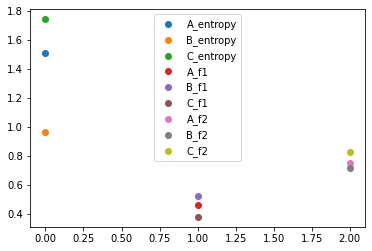

In [51]:
plt.scatter(0, A_entropy)
plt.scatter(0, B_entropy)
plt.scatter(0, C_entropy)

plt.scatter(1,A_f1)
plt.scatter(1,B_f1)
plt.scatter(1,C_f1)

plt.scatter(2, A_f2)
plt.scatter(2, B_f2)
plt.scatter(2, C_f2)

plt.legend(['A_entropy', 'B_entropy', 'C_entropy','A_f1', 'B_f1', 'C_f1', 
           'A_f2', 'B_f2', 'C_f2'], )
plt.show()

With this plot it's easy to find the more crispier values. We can conclude that $f_1(\tilde{C})$ is the lowest in $f_1$ scores, and for other metrics $\tilde{B}$ has the lowest values. \\
So we can say that $\tilde{B}$ is more cripier than others not $\tilde{A}$!

## Ex 14.
Answer to the question 2, chapter 4 of Zimmermann, 4th ed, 2001 book.

It seems that the question want the equation
\begin{equation}
\frac{d(\tilde{A})}{||support(\tilde{A})||}
\end{equation}
We know that $d(\tilde{A})$ can be computed via
\begin{equation}
d(\tilde{A}) = H(\tilde{A}) + H(C\tilde{A}) 
\end{equation}
So we implement it.

In [52]:
def find_maximum_entropy_dependence(fuzzyset, K=1):
    """
    find the metric `d` using the entropy and its complementary and divide it with support vector size
    
    Parameters:
    -----------
    fuzzyset : array of tuples
        the fuzzyset that its entropy is needed to be computed
    K : integer
        the paramter for entropy
        
    Returns:
    ----------
    maximized_entropy : float
    """
    
    fuzzy_entropy = find_entropy(fuzzyset, K)
    
    ## implemented in excersise 6
    ## find the complement of the fuzzy set
    fuzzy_complemented = complement_fuzzy(fuzzyset)
    
    fuzzy_c_entropy = find_entropy(fuzzy_complemented, K)
    
    maximized_entropy = fuzzy_entropy + fuzzy_c_entropy
    
    support_size = 0
    ## find support set size
    for value in fuzzyset[:, 1]:
        ## values == 1 are the core values
        ## so we need to ignore them
        if value !=1:
            support_size += value
    
    maximized_entropy /= support_size
    
    return maximized_entropy

In [53]:
A_tilde = np.array([[7, 0.1], [8, 0.5], [9, 0.8], [10, 1], 
                    [11, 0.8], [12, 0.5], [13, 0.1]])
find_maximum_entropy_dependence(A_tilde)
## ignore the warning
## it's handled

<ipython-input-18-797f3d2d4b62>:157: RuntimeWarning: divide by zero encountered in log
  log_mu = np.log(mu)


1.0847375553497007

# Fuzzy Relations and Operations

### Ex 16.
Answer to the question 3, chapter 6 of Zimmermann, 4th ed, 2001 book.

To answer this question we first define the functions we need.

In [54]:
def find_projection(fuzzy_relation, K):
    """
    Find the K-th projection of the fuzzy relation
    note that K must be less equal than the dimension of fuzzy_relation!
    (Here the function just supports 2-dimensions)
    
    Parameters:
    -----------
    fuzzy_relation : matrix_like
        the relation between two or more fuzzy sets
    K : integer
        parameter to choose to find which dimension projection to be calculated
        either `1` or `2`
        
    Returns:
    --------
    projection : array_like
        the projection of membership functions
    """
    
    assert K == 1 or K==2, "K must be either 1 or 2!"
    ## initialize variable
    projection = []
    if K == 1:
        projection = np.max(fuzzy_relation, axis=1)
    elif K == 2:
        projection = np.max(fuzzy_relation, axis=0)
        
    return projection
def find_cylindrical_extension(fuzzy_mu, count, axis):
    """
    Extend a fuzzy membership values using cylindrical extension
    with a special counts and on an axis
    
    Parameters:
    -----------
    fuzzy_mu : array_like
        array of membership values
    count : positive integer
        count of how many dimensions to add
    axis : 0 or 1
        extend on the given axis
        0 -> extend horizontally
        1 -> extend vertically
        
    Returns:
    --------
    relation : numpy matrix
        the relation that found via extending
    """
    ## intialize the variable with one row or column
    relation = np.copy(fuzzy_mu)
    
    ## iteratively add columns or rows
    if axis == 0:
        ## adding columns
        for i in range(1, count):
            relation = np.column_stack((relation, fuzzy_mu))
    else:
        ## adding rows
        for i in range(1, count):
            relation = np.append(relation, fuzzy_mu, axis=0 )
    
    return relation

In [55]:
R = np.matrix('0.5 0 1 0.9 0.9; 1 0.4 0.5 0.3 0.1; 0.7 0.8 0 0.2 0.6; 0.1 0.3 0.7 1 0')
R

matrix([[0.5, 0. , 1. , 0.9, 0.9],
        [1. , 0.4, 0.5, 0.3, 0.1],
        [0.7, 0.8, 0. , 0.2, 0.6],
        [0.1, 0.3, 0.7, 1. , 0. ]])

$\mu_{\tilde{R}^{(1)}}$

In [56]:
projection_first = find_projection(R, K=1)
projection_first

matrix([[1. ],
        [1. ],
        [0.8],
        [1. ]])

$\mu_{\tilde{R}^{(2)}}$

In [57]:
projection_second = find_projection(R, K=2)
projection_second

matrix([[1. , 0.8, 1. , 1. , 0.9]])

cylindrical extension for $\mu_{\tilde{R}^{(1)}}$

In [58]:
find_cylindrical_extension(projection_first, count=5, axis=0)

matrix([[1. , 1. , 1. , 1. , 1. ],
        [1. , 1. , 1. , 1. , 1. ],
        [0.8, 0.8, 0.8, 0.8, 0.8],
        [1. , 1. , 1. , 1. , 1. ]])

cylindrical extension for $\mu_{\tilde{R}^{(2)}}$

In [59]:
find_cylindrical_extension(projection_second, count=4, axis=1)

matrix([[1. , 0.8, 1. , 1. , 0.9],
        [1. , 0.8, 1. , 1. , 0.9],
        [1. , 0.8, 1. , 1. , 0.9],
        [1. , 0.8, 1. , 1. , 0.9]])

## Ex 17.
Answer to the question 12, chapter 3 from the book Ross, 4th ed. 2017

In this question $\tilde{A}$ and $\tilde{R}$ are given and $\tilde{B}$ is the 
composition of these two is wanted. 

In [60]:
class compositions:
    
    def __init__(self, fuzzy_set1, fuzzy_set2):
        """
        Parameters:
        -----------
        fuzzy_set1 : matrix of tuples
        fuzzy_set2 : matrix of tuples

        """
        self.fuzzy_set1 = fuzzy_set1
        self.fuzzy_set2 = fuzzy_set2
    
    def __find_vector_average(self, vector1, vector2):
        """
        find elemnt wise averages 
        
        Parameters:
        -----------
        vector1 : array_like
        vector2 : array_like

        Returns:
        ----------
        averages : array_like
            the elemnt-wise averages of two input vectors
        """
        averages = (vector1 + vector2) * 0.5
        
        return averages

    def find_composition(self, c_type='min-max'):
        """
        Apply the requested composition on two fuzzy sets
        (fuzzy_set1 composition_operator fuzzy_set2)

        Parameters:
        ------------
        c_type : string
            the type of composition needed to be done
            `min-max` : apply the min-max composition, this is the default if nothing was passed
            `max-min` : apply the max-min composition
            `min-min` : apply the min-min composition
            `max-max` : apply the max-max composition
            `max-average` : apply the max-average composition
            `sum-product` : apply the sum-production composition
            
        Returns:
        ---------
        composition : matrix of tuples
            depending on entered fuzzy sets can be a matrix or an array
        """
        ## save the sets in another variable 
        fuzzy_set1 = self.fuzzy_set1
        fuzzy_set2 = self.fuzzy_set2
        
        ## for the first entered fuzzy set we would use rows
        rows = fuzzy_set1.shape[0]
        ## And for the second set the column is used to find the compositions
        columns = fuzzy_set2.shape[1]

        composition = []
        ## iterate over values and find the composition result
        for i in range(0, rows):
            ## save each dimension
            ## meaning each row vector 
            results_arr = []
            for j in range(0, columns):
                ## res is the composition of each row and column
                ## initialize it
                res = -1
                
                ## apply the requested composition
                if c_type == 'min-max':
                    ## second fuzzy set is transposed here to find element-wise minumum or maximm in the vector
                    res = np.min(np.maximum(fuzzy_set1[i], fuzzy_set2[:, j].T))
                elif c_type == 'max-min':
                    res = np.max(np.minimum(fuzzy_set1[i], fuzzy_set2[:, j].T))
                elif c_type == 'min-min':
                    res = np.min(np.minimum(fuzzy_set1[i], fuzzy_set2[:, j].T))
                elif c_type == 'max-max':
                    res = np.max(np.maximum(fuzzy_set1[i], fuzzy_set2[:, j].T))
                elif c_type == 'max-average':
                    res = np.max(self.__find_vector_average(fuzzy_set1[i], fuzzy_set2[:, j].T))
                elif c_type == 'sum-product':
                    res = np.sum(np.multiply(fuzzy_set1[i], fuzzy_set2[:, j].T))
                else:
                    raise ValueError("Error, Unrecognized Category!")
                ## save the result of each value
                results_arr.append(res)

            ## and save each row in the results matrix (composition matrix)
            composition.append(results_arr)

        ## convert to numpy matrix to easily reshape it as a matrix
        composition = np.matrix(composition)
        composition = composition.reshape((rows, columns))

        return composition

In [61]:
R_tilde = np.matrix('0.7 0.6 0.5; 0.3 0.2 0.5; 0.2 0.4 0.7')
A_tilde = np.matrix('0.4 0.5 0.3')

In [62]:
m_compositions = compositions(A_tilde, R_tilde)
m_compositions.find_composition(c_type='max-min')

matrix([[0.4, 0.4, 0.5]])

In [63]:
m_compositions.find_composition(c_type='min-max')

matrix([[0.3, 0.4, 0.5]])

In [64]:
m_compositions.find_composition(c_type='min-min')

matrix([[0.2, 0.2, 0.3]])

In [65]:
m_compositions.find_composition(c_type='max-max')

matrix([[0.7, 0.6, 0.7]])

In [66]:
m_compositions.find_composition(c_type='max-average')

matrix([[0.55, 0.5 , 0.5 ]])

In [67]:
m_compositions.find_composition(c_type='sum-product')

matrix([[0.49, 0.46, 0.66]])

# Linguistic Variables

## Ex 18.
Answer to the question 1, chapter 9 of Zimmermann, 4th ed, 2001 book.

We first plot the original membership function.
\begin{equation}
\mu_{old}(x)
\begin{cases}
0 & \text{if  } x \in [0,40] \\
\Big(1+\big(\frac{x-40}{5}\big)^{-2}\Big)^{-1} & \text{if  } x \in (40, 100] \\
0 & \text{else}
\end{cases}
\end{equation}
We can either apply the linguistic operators on the equation or the membership values. We would like to do both, So the equations would be like below. For "Very":
\begin{equation}
\mu_{Very_old}(x)
\begin{cases}
0 & \text{if  } x \in [0,40] \\
\Big(1+\big(\frac{x-40}{5}\big)^{-2}\Big)^{-2} & \text{if  } x \in (40, 100] \\
0 & \text{else}
\end{cases}
\end{equation}
For the term "Not Very":
\begin{equation}
\mu_{Very_old}(x)
\begin{cases}
0 & \text{if  } x \in [0,40] \\
1 - \Big(1+\big(\frac{x-40}{5}\big)^{-2}\Big)^{-2} & \text{if  } x \in (40, 100] \\
0 & \text{else}
\end{cases}
\end{equation}
And for the other term "more or less":
\begin{equation}
\mu_{old}(x)
\begin{cases}
0 & \text{if  } x \in [0,40] \\
\Big(1+\big(\frac{x-40}{5}\big)^{-2}\Big)^{-1/2} & \text{if  } x \in (40, 100] \\
0 & \text{else}
\end{cases}
\end{equation}
And To apply the other method we will use python.

In [68]:
def membership_function_Q1_CH9(X):
    """
    The membership function belonging to Question 1 - Chapter 9 of the Zimmerman book.
    
    Parameters:
    -----------
    X : array_like
        an array of numbers
        
    Returns:
    ---------
    fuzzy_set : array of tuples
        a fuzzy set, created with values of X
    """
    mu = np.power(1 + np.power((X-40)/ 5, -2), -1)
    
    ## remove the memberhsip values for X in [0, 40] or less than 0 or greater than 100
    mu = np.where((((X <= 40) & (X >=0)) | (X < 0) | (X > 100)), 0, mu)
    
    fuzzy_set = np.stack((X, mu), axis=1)
    
    return fuzzy_set
def find_fuzzy_Dialation(fuzzy_set):
    """
    The Dialation operator representing the linguistic variable `More Or Less`
    
    Parameters:
    -----------
    fuzzy_set : array of tuples
        the original fuzzy set (numpy array is needed!)
    
    Returns:
    ---------
    new_fuzzy_set : array of tuples
        the new fuzzy set that dialation is applied to its membership values
    """
    ## copy the set's values
    X = fuzzy_set[:, 0].copy()
    mu = fuzzy_set[:, 1].copy()
    mu = np.power(mu, 0.5)
    
    ## create a new fuzzy set
    new_fuzzy_set = np.stack((X, mu), axis=1)
    
    return new_fuzzy_set

def find_fuzzy_concentration(fuzzy_set):
    """
    The concentration operator representing the linguistic variable `Very`
    
    Parameters:
    -----------
    fuzzy_set : array of tuples
        the original fuzzy set (numpy array is needed!)
    
    Returns:
    ---------
    new_fuzzy_set : array of tuples
        the new fuzzy set that concentration is applied to its membership values
    """
    ## copy the set's values
    X = fuzzy_set[:, 0].copy()
    mu = fuzzy_set[:, 1].copy()
    mu = np.power(mu, 2)
    
    ## create a new fuzzy set
    new_fuzzy_set = np.stack((X, mu), axis=1)
    
    return new_fuzzy_set

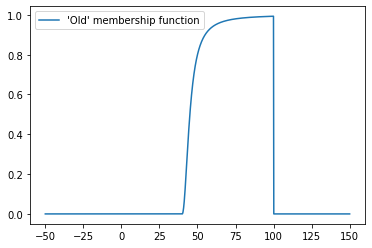

In [69]:
X = np.linspace(-50, 150, 1000)
fuzzy_set = membership_function_Q1_CH9(X)

Y = fuzzy_set[:, 1]

plt.plot(X, Y)
plt.legend(["'Old' membership function"])
plt.show()

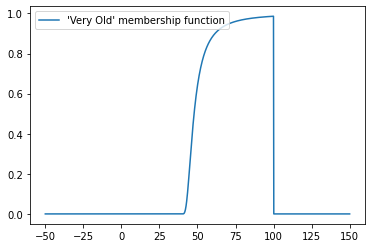

In [70]:
fuzzy_set_concentration = find_fuzzy_concentration(fuzzy_set)

Y = fuzzy_set_concentration[:, 1]

plt.plot(X, Y)
plt.legend(["'Very Old' membership function"], loc='upper left')
plt.show()

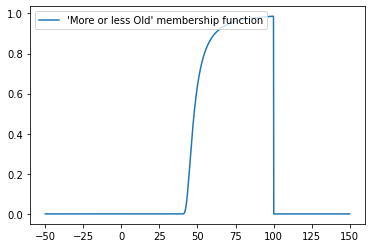

In [71]:
fuzzy_set_dialation = find_fuzzy_Dialation(fuzzy_set)

Y = fuzzy_set_concentration[:, 1]

plt.plot(X, Y)
plt.legend(["'More or less Old' membership function"], loc='upper left')
plt.show()

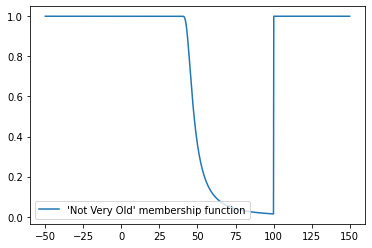

In [72]:
## Apply `not` on `very old`
Y = fuzzy_set_concentration[:, 1]

plt.plot(X, 1-Y)
plt.legend(["'Not Very Old' membership function"], loc='lower left')
plt.show()

## Ex 19. 
Answer to the question 19, chapter 5 from the book Ross, 4th ed. 2017

We re-name each set as below.
\begin{equation}
\tilde{A} = \text{"Low Precipitation"} = \big\{[20, 0.8], [30, 0.6], [40, 0.5], [50, 0.2], [60, 0.1]\big\} \\
\tilde{B} = \text{"High Precipitation"} = \big\{[20, 0.2], [30, 0.3], [40, 0.6], [50, 0.8], [60, 1]\big\}  \\
\tilde{C} = \text{"High Precipitation"} = \big\{[2.5, 0.9], [5, 0.7], [7.5, 0.4], [10, 0.2], [12.5, 0.1]\big\} \\
\tilde{D} = \text{"High Precipitation"} = \big\{[2.5, 0.3], [5, 0.2], [7.5, 0.5], [10, 0.8], [12.5, 0.9]\big\} 
\end{equation}

In [73]:
A_tilde = np.array([[20, 0.8], [30, 0.6], [40, 0.5], [50, 0.2], [60, 0.1]])
B_tilde = np.array([[20, 0.2], [30, 0.3], [40, 0.6], [50, 0.8], [60, 1]])
C_tilde = np.array([[2.5, 0.9], [5, 0.7], [7.5, 0.4], [10, 0.2], [12.5, 0.1]])
D_tilde = np.array([[2.5, 0.3], [5, 0.2], [7.5, 0.5], [10, 0.8], [12.5, 0.9]])

### (i) Very low precipitation
Applying "Very" on $\tilde{A}$, means we need to apply concentration function.

In [74]:
find_fuzzy_concentration(A_tilde)

array([[20.  ,  0.64],
       [30.  ,  0.36],
       [40.  ,  0.25],
       [50.  ,  0.04],
       [60.  ,  0.01]])

### (ii) Very high Intensity
Applying "Very" on $\tilde{D}$, means we need to apply concentration function.

In [75]:
find_fuzzy_concentration(D_tilde)

array([[ 2.5 ,  0.09],
       [ 5.  ,  0.04],
       [ 7.5 ,  0.25],
       [10.  ,  0.64],
       [12.5 ,  0.81]])

### (iii) Not Very high precipitation
Applying "Not Very" on $\tilde{B}$, means we need to first apply concentration function and second apply complement on fuzzy values. (Note that complement funciton is written in Excersise 6 and will be used here)

In [76]:
complement_fuzzy(find_fuzzy_concentration(B_tilde))

array([[20.  ,  0.96],
       [30.  ,  0.91],
       [40.  ,  0.64],
       [50.  ,  0.36],
       [60.  ,  0.  ]])

### (iv) Not Very high and not very low intensity
We need to use the method we used in part (iii) and another and method that we implement it here.

In [77]:
def find_fuzzy_and(fuzzy_set1, fuzzy_set2):
    """
    Apply standard `and` operator on two fuzzy sets
    (Note: the domains must be the same)
    
    Parameters:
    -----------
    fuzzy_set1 : matrix of tuples
    fuzzy_set2 : matrix of tuples

    Returns:
    ---------
    fuzzy_result : matrix of tuples
        the result of standarad `and` operation on fuzzy_set1 and fuzzy_set2
    """
    ## get the membership values
    mu_1 = fuzzy_set1[:, 1]
    mu_2 = fuzzy_set2[:, 1] 
    
    mu = np.minimum(mu_1, mu_2)
    
    fuzzy_result = np.stack((fuzzy_set1[:, 0], mu), axis=1)
    return fuzzy_result

In [78]:
## Not Very High Intensity
not_very_D_tilde = complement_fuzzy(find_fuzzy_concentration(D_tilde))
not_very_D_tilde

array([[ 2.5 ,  0.91],
       [ 5.  ,  0.96],
       [ 7.5 ,  0.75],
       [10.  ,  0.36],
       [12.5 ,  0.19]])

In [79]:
## Not Very Low Intensity
not_very_C_tilde = complement_fuzzy(find_fuzzy_concentration(C_tilde))
not_very_C_tilde

array([[ 2.5 ,  0.19],
       [ 5.  ,  0.51],
       [ 7.5 ,  0.84],
       [10.  ,  0.96],
       [12.5 ,  0.99]])

In [80]:
## The result of and operator
find_fuzzy_and(not_very_C_tilde, not_very_D_tilde)

array([[ 2.5 ,  0.19],
       [ 5.  ,  0.51],
       [ 7.5 ,  0.75],
       [10.  ,  0.36],
       [12.5 ,  0.19]])

### (v) Slightly high precipitation and slightly low precipitation
For the term "Slightly" we need to apply the equation below
\begin{equation}
\text{Slightly }\tilde{A} = \texttt{int}[\texttt{plus } \tilde{A}\texttt{ and not }(\texttt{very} \tilde{A})] 
\end{equation}

the intensification function equation is as below
\begin{equation}
\mu_{int(\tilde{A})}(u) = \begin{cases}
2(\mu_{\tilde{A}}(u))^2 & \text{for  }\mu_{\tilde{A}}(u) \in [0, 0.5] \\
1 - 2(1 - \mu_{\tilde{A}}(u))^2  & \text{otherwise}
\end{cases}
\end{equation}
So we implement it using python as below.

In [81]:
def find_fuzzy_intensification(fuzzy_set):
    """
    The Intensification operator
    
    Parameters:
    -----------
    fuzzy_set : array of tuples
        the original fuzzy set (numpy array is needed!)
    
    Returns:
    ---------
    new_fuzzy_set : array of tuples
        the new fuzzy set that intensification is applied to its membership values
    """
    ## copy the set's values
    X = fuzzy_set[:, 0].copy()
    original_mu = fuzzy_set[:, 1].copy()
    
    mu = 2*np.power(original_mu, 2)
    
    ## apply the second condition in the equation of Intensification
    mu = np.where((original_mu >=0) | (original_mu<=0.5), mu, 1 - 2 * np.power(1- original_mu, 2))
    
    ## create a new fuzzy set
    new_fuzzy_set = np.stack((X, mu), axis=1)
    
    return new_fuzzy_set

def find_fuzzy_plus(fuzzy_set):
    """
    The plus operator in fuzzy sets
    
    Parameters:
    -----------
    fuzzy_set : array of tuples
        the original fuzzy set (numpy array is needed!)
    
    Returns:
    ---------
    new_fuzzy_set : array of tuples
        the new fuzzy set that plus is applied to its membership values
    """
    ## copy the set's values
    X = fuzzy_set[:, 0].copy()
    mu = fuzzy_set[:, 1].copy()
    
    mu = np.power(mu, 1.25)
    
    ## create a new fuzzy set
    new_fuzzy_set = np.stack((X, mu), axis=1)
    
    return new_fuzzy_set

In [82]:
## for slightly we've broken the equation down into many parts
p1_set = find_fuzzy_plus(A_tilde)
p2_set = complement_fuzzy(find_fuzzy_Dialation(A_tilde))
## apply and operator
p3_set = find_fuzzy_and(p1_set, p2_set)


result = find_fuzzy_intensification(p3_set)
result

array([[20.        ,  0.02229124],
       [30.        ,  0.10161332],
       [40.        ,  0.17157288],
       [50.        ,  0.03577709],
       [60.        ,  0.00632456]])

In [83]:
## restore printing option to default
## meaning scientific notation would be applied
np.set_printoptions(suppress=False)